Voici le tableau de la répartition des taches : 

In [261]:
taches = [["Somme-Emission CO2 dans le monde",
           "Moyenne-Emission CO2 dans le monde",
           "Somme-Pays",
           "Moyenne-Pays",
           "Map interactive",
           "Somme-Emission CO2 par secteur",
           "Production generale d'electricite",
           "Emission CO2 Transport-Barre",
           "Brazil Ama"],


          ["Emission CO2 par moyen de transport-Camembert",
           "Projection- Emission CO2 par moyen de transport",
           "Shareforest B&I",
           "Deforestation",
           "Source de prod. d'electricite"]]

taches_df = pd.DataFrame(taches, index = ["Audric","Jonathan"])

taches_df

,0,1,2,3,4,5,6,7,8
Audric,Somme-Emission CO2 dans le monde,Moyenne-Emission CO2 dans le monde,Somme-Pays,Moyenne-Pays,Map interactive,Somme-Emission CO2 par secteur,Production generale d'electricite,Emission CO2 Transport-Barre,Brazil Ama
Jonathan,Emission CO2 par moyen de transport-Camembert,Projection- Emission CO2 par moyen de transport,Shareforest B&I,Deforestation,Source de prod. d'electricite,None,None,None,None




Suite à la situation actuelle de la planete, nous nous interesserons au réchauffement climatique dont la principale cause est le gaz à effet de serre du à la hausse du C02. Nous présenterons dans ce document quels ont été les différents secteurs ayant eu un impact sur la hausse de l'émission de CO2 ces dernières années. Pour répondre à cette problématique nous étudierons dans un premier temps le CO2 dans le monde et par la suite les principaux secteurs d'émissions de CO2

# I - Le CO2 dans le monde
## 1 - Les continents
Tout d'abord les continents, ci-dessous nous avons deux cartes nous informant de la somme et la moyenne des émissions de CO2 en 2019.Voici la première représentant la somme.

<Figure size 640x480 with 0 Axes>

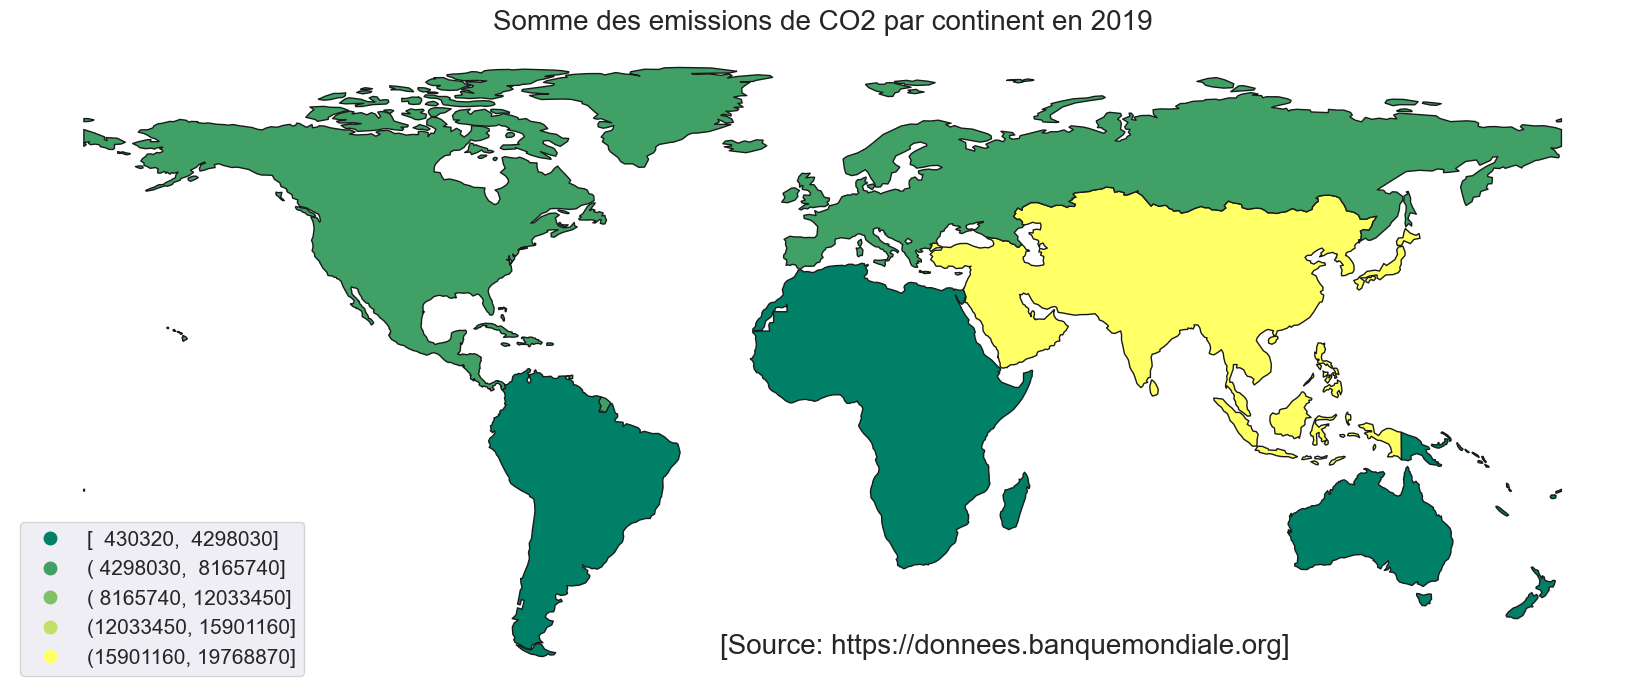

In [260]:
#!pip install geopandas
import geopandas as gp
#!pip install folium matplotlib mapclassify 
import folium
#Importation des differentes librairy tel que numpy,pandas,seanborn,matplotlib,
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#lecture et affichage de world provenant de geopandas
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world.head()

#Lecture et affichage d'un jeu de données, contenant les émisssions de CO2 en KT dans le monde
data = pd.read_csv("CO2KT.csv",sep =",",header = 2)
data.head()

#supression des colonnes que je ne compte pas utiliser sur data
#création d'une variable année afin de garder les 30 dernieres année
année = data.drop(["Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","2020","2021","Unnamed: 66"],axis = 1)
data.drop(["Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1991","1992","1993","1994","1996","1997","1998","1999","2001","2002","2003","2004","2006","2007","2008","2009","2011","2012","2013","2014","2016","2017","2018","2020","2021","Unnamed: 66"],axis =1,inplace = True )
data.head()
année.head()

#breve statistique sur data et année
data.describe()
année.describe()

#affichage des dimensions de nos deux dataframes
année.shape
data.shape

#renommer la colonne iso_a3 car elle correspond a Country code
world.rename(columns = {"iso_a3":"Country Code"}, inplace = True) 

#création d'une colonne somme pour avoir la somme des émissions sir les 30 dernieres années
année["somme"] = année.sum(axis= 1, numeric_only = True)
#création d'une colonne moyenne pour avoir la somme des émissions sir les 30 dernieres années
année["moyenne"] = année.mean(axis = 1, numeric_only = True)
année

#fusion de année et world afin de créer une carte par la suite
année = world.merge(année, how ="inner", on = "Country Code", sort = True)

#Extraction de country, somme et géometry dans une variable représentant la somme par pays et affichage
annéeS = année[["Country Name","somme","geometry"]]
annéeS

#Extraction de country, moyenne et géometry dans une variable représentant la moyenne par pays et affichage
annéeM = année[["geometry","moyenne","Country Name"]]
annéeM

#fusion entre world et data pour établir un groupby plus tard
w = world.merge(data, how ="inner", on = "Country Code", sort = True)

#suppresion des colonnes quui ne vont pas être utiliser et affichage pour vérifier la fusion 
w.drop(["Country Code","gdp_md_est"],axis = 1, inplace = True)
w.head()

#Statistique rapide
w.describe()

#somme d'émission de co2 par continent en 2019
continentsum = w.dissolve('continent',aggfunc = np.sum)
continentsum2019 = continentsum[["geometry","2019"]]
continentsum2019

#création d'une carte représentant les émissions de CO2 par continent en 2019
plt.figure()
ax1 = continentsum2019.plot(figsize = (20,8),
                            cmap="summer", edgecolor="k", 
                            legend = True,
                            scheme = "equal_interval",
                            column = "2019",
                            k = 5, 
                            legend_kwds={"loc" : "lower left",'interval':True,'fontsize':15,'fmt':"{:.0f}"})
ax1.axis(False)


title = "Somme des emissions de CO2 par continent en 2019"
plt.title(title,fontsize=20)

plt.text(-25,-55,'[Source: https://donnees.banquemondiale.org]', fontsize=20)
plt.savefig("Sommecontinent2019.png")

La seconde, informant sur la moyenne des émissions en 2019 par continent

<Figure size 640x480 with 0 Axes>

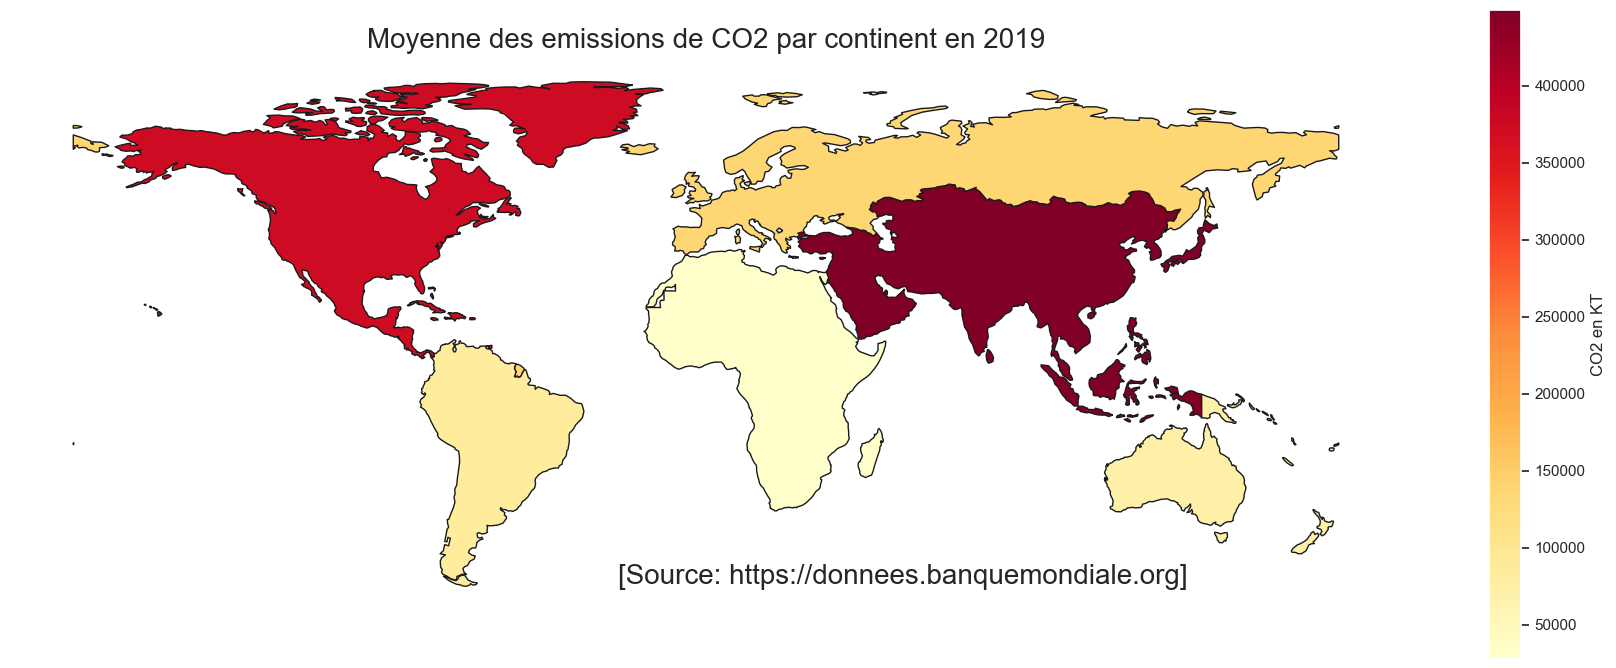

In [131]:
#moyenne d'émission de co2 par conntinent en 2019 
continent = w.dissolve('continent',aggfunc = np.mean)
continent2019 = continent[["geometry","2019"]]
continent2019

#création d'une carte représentant la moyenne des émissions de CO2 par continent en 2019
plt.figure()
ax2 = continent2019.plot(figsize = (20,8),
                         cmap='YlOrRd',edgecolor="k", legend = True,
                         column = "2019",
                         legend_kwds = {'label':'CO2 en KT'})

ax2.axis(False)

title = "Moyenne des emissions de CO2 par continent en 2019"
plt.title(title,fontsize=20)

plt.text(-25,-55,'[Source: https://donnees.banquemondiale.org]', fontsize=20)
plt.savefig("Meancontinent2019.png")

## 2 - Les pays
Nous observerons la somme et la moyenne des émissions de CO2 sur les 30 dernières années par pays, commencons par la somme ci-dessous.

<Figure size 640x480 with 0 Axes>

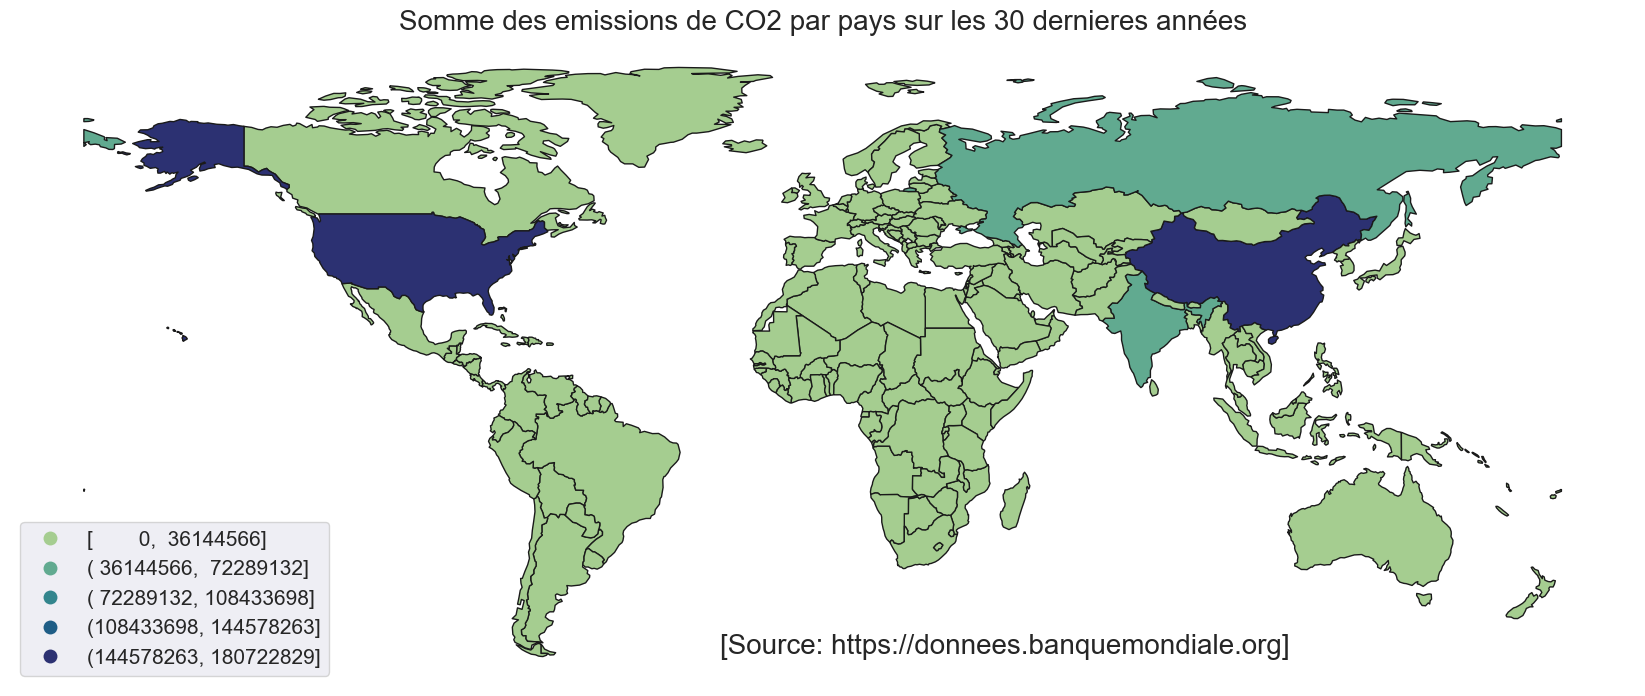

In [127]:
plt.figure()
ax3 = annéeS.plot(figsize = (20,8),
                         cmap='crest',edgecolor="k", legend = True,
                         scheme = "equal_interval",
                         column = "somme",
                         k = 5,
                        legend_kwds={"loc" : "lower left",'interval':True,'fontsize':15,'fmt':"{:.0f}"})

ax3.axis(False)

title = "Somme des emissions de CO2 par pays sur les 30 dernieres années"
plt.title(title,fontsize=20)

plt.text(-25,-55,'[Source: https://donnees.banquemondiale.org]', fontsize=20)
plt.savefig("sommePays.png")

Et maintenant, la moyenne des émissions de CO2 par pays.

<Figure size 640x480 with 0 Axes>

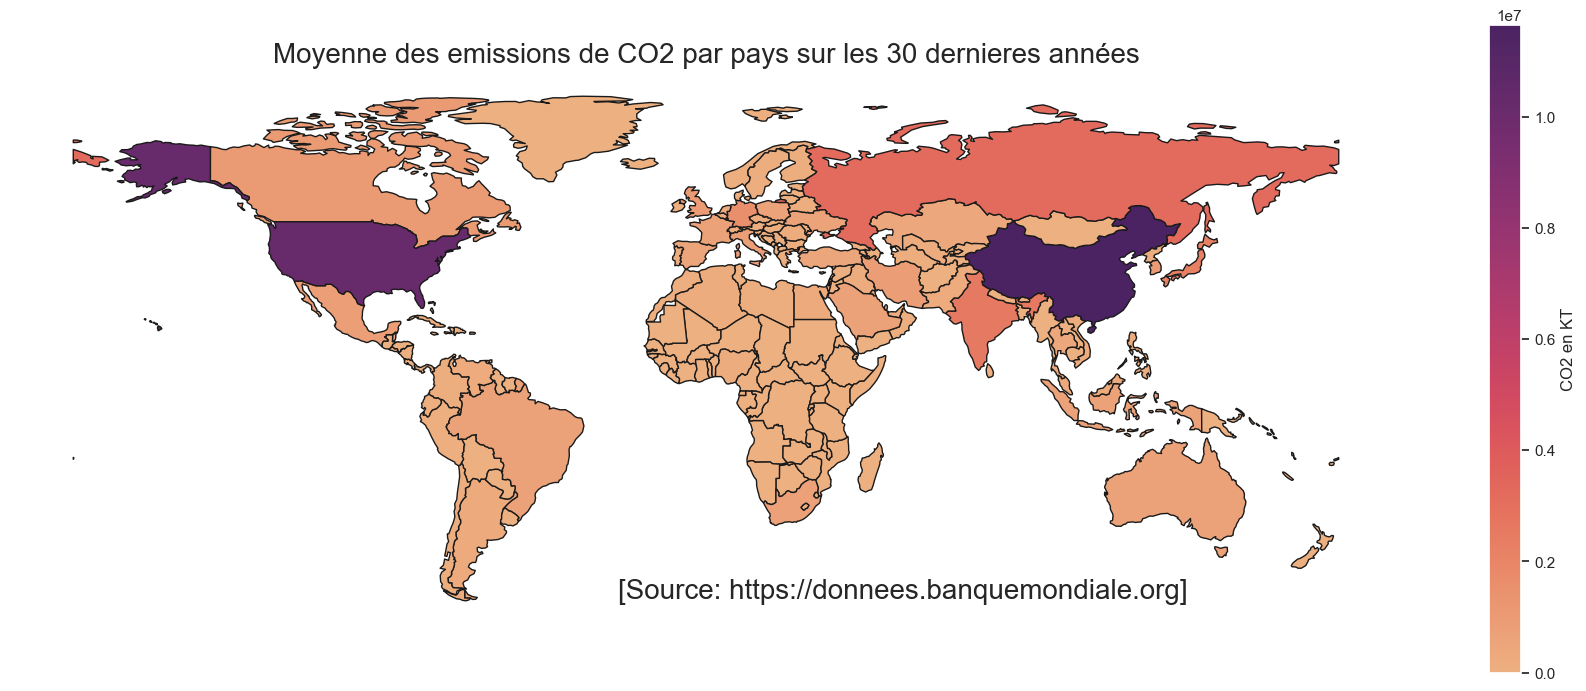

In [125]:
plt.figure()
ax4 = annéeM.plot(figsize = (20,8),
                         cmap='flare',edgecolor="k", legend = True,
                         column = "moyenne",
                         legend_kwds ={'label':'CO2 en KT'})
ax4.axis(False)

title = "Moyenne des emissions de CO2 par pays sur les 30 dernieres années"
plt.title(title,fontsize=20)

plt.text(-25,-55,'[Source: https://donnees.banquemondiale.org]', fontsize=20)
plt.savefig("meanPays.png")

## 3 - Map intéractive
Ci-dessous une représentation intéractive des données collectées permettant leur exploration en fonction des pays ou des continents. Elle permet la visualisation des 4 cartes précédentes en les sélectionnant. 


In [132]:
#création d'une map intéractive avec l'aide de explore

map = continent2019.explore(highlight = True, #surbrillance sur le passage d'une géométrie
     tooltip="continent", # montre le continent dans la bulle 
     popup=True, # montre les données en cliquant 
     column="2019",  # couleur basée sur la colonne "2019" 
     scheme="naturalbreaks",  # utilisation mapclassify's natural breaks scheme
     legend=True, # afficher la legende
     k=5, # 
     legend_kwds=dict(colorbar=False), # ne pas utiliser une barre de couleur
     name = "moyenne par continent en 2019")

#l'ajout des somme et moyenne par continent en 2019 et des somme et moyenne par pays sur les 30 dernieres années
continentsum2019.explore(m=map,column="2019" ,tooltip="continent",popup=True,legend_kwds=dict(colorbar=False),name = "somme par continent en 2019")
annéeS.explore(m=map,column="somme" ,tooltip="Country Name",popup=True,legend_kwds=dict(colorbar=False),name = "somme par pays ")
annéeM.explore(m=map,column="moyenne" ,tooltip="Country Name",popup=True,legend_kwds=dict(colorbar=False),name = "moyenne par pays")

#l'ajout de 2 tuiles supplémentaires pour l'esthétique et montrer que l'on peut faire pas mal de chose avec explore
folium.TileLayer('Stamen Terrain', control=True).add_to(map)  # folium pour differentes tuiles
folium.TileLayer("Stamen Watercolor",control = True).add_to(map)

#controle de couches
folium.LayerControl().add_to(map) 

#affochage de la map interactive
map

A travers les cartes ci-dessus, nous avons remarqué que sur ces dernières années les émissions de CO2 n'ont fait que croître et on se demande bien pour quelles raisons, alors nous avons décidé d'étudier les différents secteurs les plus coûteux en CO2.

# II - Les principaux secteurs d'émissions de CO2

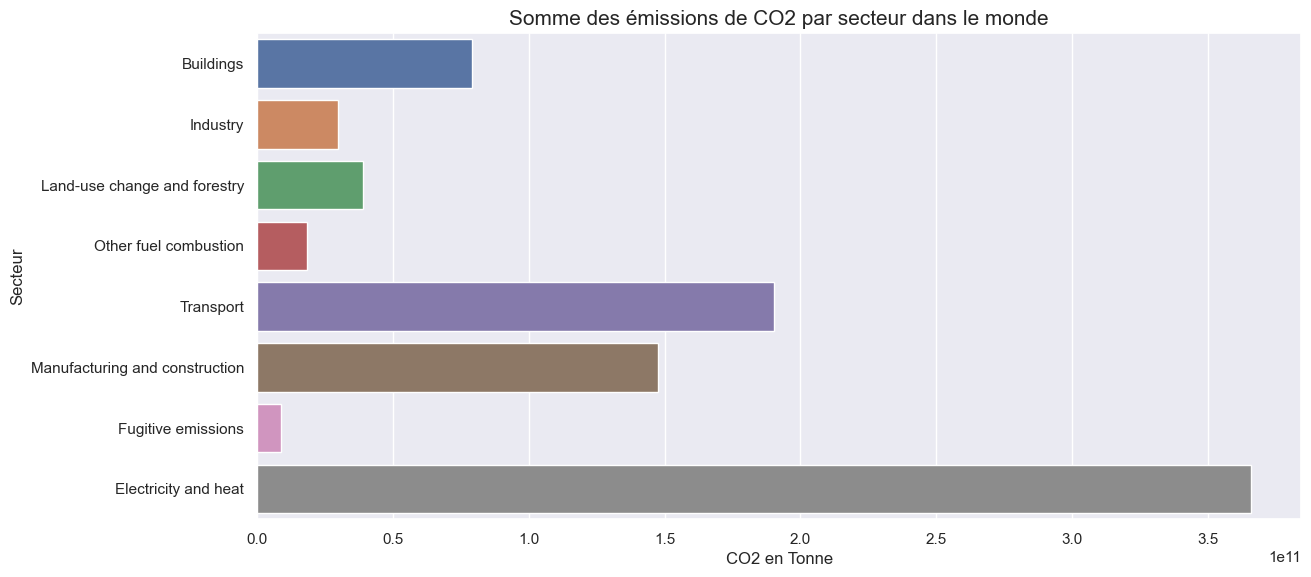

In [189]:
#Lecture et affichage d'un jeu de données  représentant les émissions de CO2 par secteur de 1990 a 2019
secteur = pd.read_csv("co-emissions-by-sector.csv")
secteur

#info sur secteur, voir le nombre de valeur manquante
secteur.info

#suppresion des valeurs manquantes et affichag de la dimension de secteur
secteur.dropna(inplace = True)
secteur.shape

#création d'une variable entity qui regroupe la somme des émissions par secteurs pour chaque pays
entity = secteur.groupby(["Entity"]).sum()

#suppression de la colonnes year car on regarde sur l'ensemble des années et affichage de la variable
entity.drop(["Year"],axis = 1, inplace = True)
entity

#localisation de world
Eworld = entity.iloc[71]

#création d'un dataframe 
Eworld = pd.DataFrame(data=Eworld)

#réinitialisation de l'index
Eworld.reset_index(inplace = True)

#renommer l'index pour la clareté et afficher Eworld afin de voir si le résultat convient
Eworld.rename(columns = {"index":"Secteur"}, inplace = True) 
Eworld

#création et sauvegarde d'un diagramme en barre 
plt.figure(figsize = (12,6))
ax = plt.axes()

sns.set_theme(style="darkgrid")

sns.barplot(ax = ax, x = "World" , y = "Secteur", data = Eworld,orient ="h")
ax.set(xlabel = "CO2 en Tonne")

plt.title("Somme des émissions de CO2 par secteur dans le monde",fontsize = 15)
plt.savefig("Worldsector_somme.jpeg")

Vue ce graphique on comprend que les principales causes de l'augmentation du CO2 ces 30 dernières années sont du principalement à l'électricté et le transport.
Voilà pourquoi nous étudierons ces differents secteurs un par un afin de savoir les raisons pour lesquelles ils émettent autant. Nous observerons aussi la déforestation qui nuit à la régulation du CO2 sur la planete.

## 1- L'électricité

Ci-dessous, le graphique représentant la production globale d'électricté dans le monde ces dernières années.

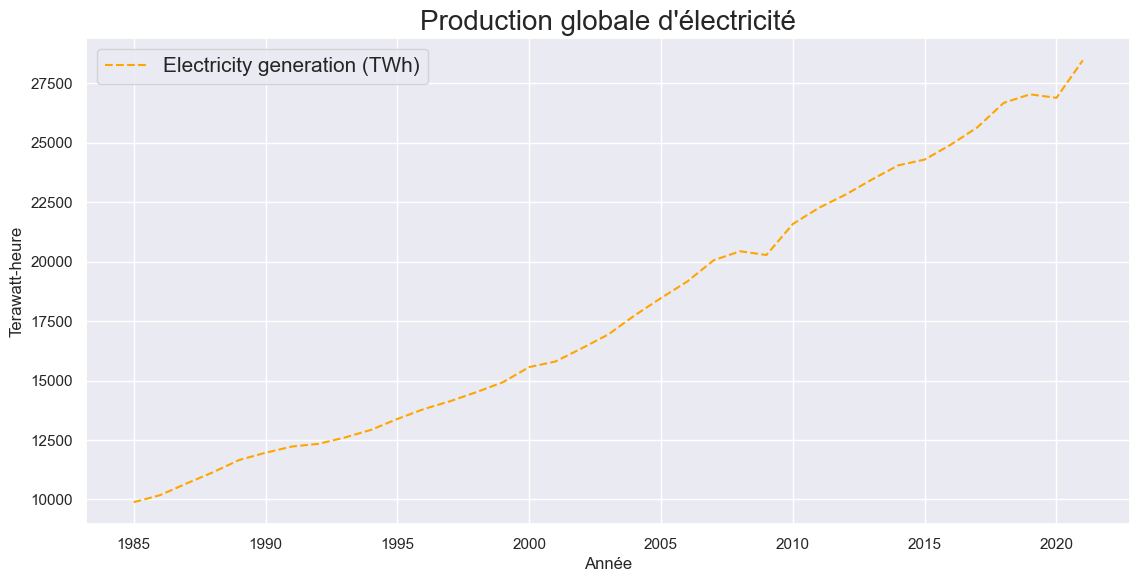

In [134]:
#Lecture et affichage du jeu de donnée
energy = pd.read_csv("energy.csv")
#on veut les données globales dans le monde 
energy = energy[energy["Entity"]=="World"]

sns.set_theme(style = "darkgrid")
#création d'un graphique représentant l'évolution de l'électricité dans le monde 
plt.figure(figsize= (12,6))
ax = plt.axes()

energy.plot(ax = ax,x = "Year", y = "Electricity generation (TWh)", legend = True, c = "orange",linestyle ="dashed")
plt.legend(fontsize= 15)
ax.set(xlabel = "Année", ylabel ="Terawatt-heure")

plt.title("Production globale d'électricité",fontsize = 20)
plt.savefig("globaleproducelec.png")

Ici nous pouvons constater que malgré la présence des énergies renouvelables et de l'énergie solaire, la principale source d'énergie de production d'électricté est le charbon. Ce dernier est le combustile le plus polluant et emettant le plus de CO2.

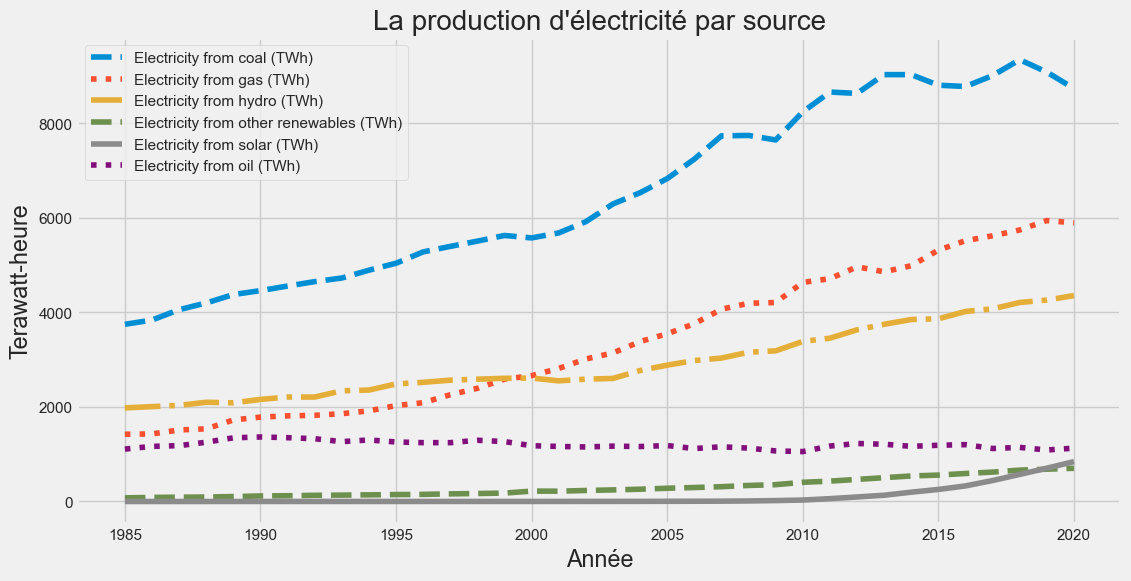

In [117]:
#Lecture et affichge d'un fichier contenant la production d'électricité par source
#sélectionnant world afin d'avoir la production mondiale sur les dernieres années
eclair = pd.read_csv("Electricity_Production_By_Source.csv")
eclair= eclair[eclair["Entity"]=="World"]
eclair


#créationn d'un graphique sur la production d'électricité par source
plt.figure(figsize = (12,6))
axx = plt.axes()

plt.style.use("fivethirtyeight")


year = "Year"

eclair.plot(x = year,y = "Electricity from coal (TWh)",ax = axx,linestyle = "--")
eclair.plot(x = year, y = "Electricity from gas (TWh)",ax = axx,linestyle = ":")
eclair.plot(x = year,y = "Electricity from hydro (TWh)",ax = axx, linestyle ="-." )
eclair.plot(x = year,y = "Electricity from other renewables (TWh)",ax = axx, linestyle ="dashed")
eclair.plot(x = year,y = "Electricity from solar (TWh)",ax = axx, linestyle ="solid" )
eclair.plot(x = year, y = "Electricity from oil (TWh)", ax = axx, linestyle = "dotted")

plt.legend(loc ="upper left")
axx.set(xlabel='Année', ylabel='Terawatt-heure')

plt.title("La production d'électricité par source",fontsize = 20)
plt.savefig("elecbysource.png")

## 2 - Le Transport

Le transport qui est omniprésent dans la vie de tous les jours, que ce soit pour aller travailler,voyager. Utiliser pratiquemeent une fois dans la journée, avec la visualisation suivante nous pouvons voir l'évolution des émissions de CO2 par transport dans le monde, l'Union Européenne et dans la zone Europe

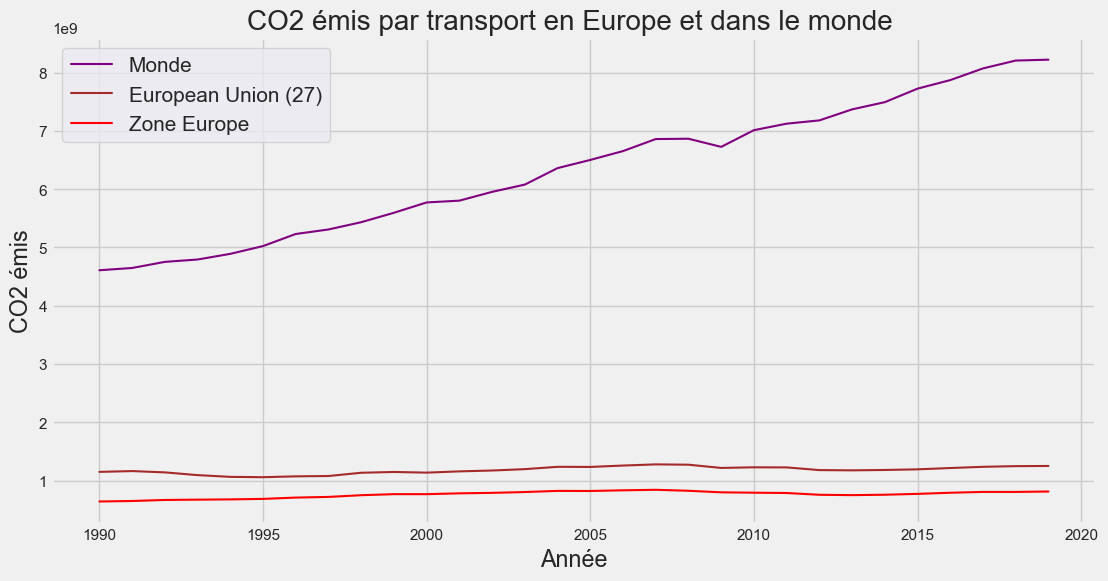

In [11]:
#Lecture et affichage d'un jeu de données qui rerésente les émissions de CO2 via le transport sur les derniers années
#on cherche à avoir World et l'union européenne
transport = pd.read_csv("co2-emissions-transport.csv")
transportEu = transport[transport["Entity"]=="European Union (27)"]
transportE = transport[transport["Entity"]=="Europe"]
transportW = transport[transport["Entity"]=="World"]

#info sur le jeu de données,suppression des valeurs manquantes,affichage de la dimensions de transport
transport.info
transport.dropna(inplace = True)
transport.shape

#statistiques rapide
transport.describe()

#création d'un graphique montrant l'évolution du CO2 émis par le transport dans le monde et en Australie 
plt.figure(figsize = (12,6))
ax = plt.axes()

sns.set_theme(style  = "darkgrid")

sns.lineplot(data = transportW, ax = ax, x = "Year", y ="Transport",color = "purple", label ="Monde" )
sns.lineplot(data = transportE, ax = ax, x = "Year", y ="Transport",color = "brown", label ="European Union (27)" )
sns.lineplot(data = transportEu, ax = ax, x = "Year", y ="Transport",color= 'red', label = "Zone Europe")
plt.legend(fontsize =15,loc = "upper left" )

ax = ax.set(xlabel='Année', ylabel='CO2 émis')
plt.title("CO2 émis par transport en Europe et dans le monde ",fontsize = 20)

plt.savefig("linetransportCO2.jpeg")

Ce diagramme circulaire représente la proportion des émissions de CO2 par mode de transport dans l'Union Européenne et nous pouvons remarquer que les vols internationaux sont en première position,suivis par le transport maritime et les vols domestiques.

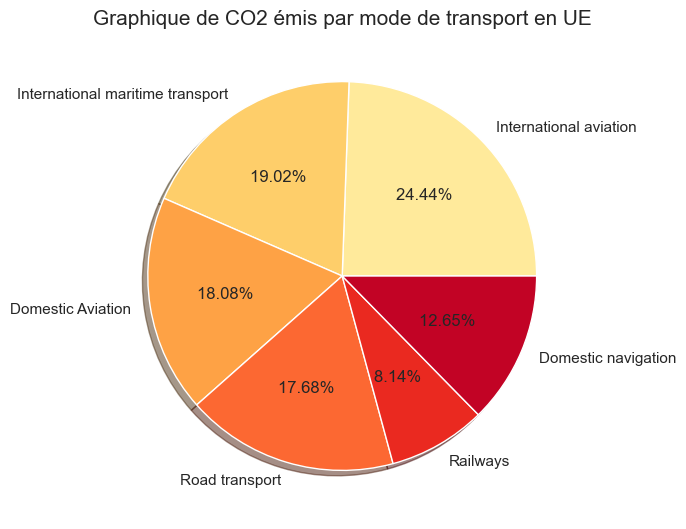

In [12]:
#Lecture et affichage d'un jeu de données contenant le CO2 émis par mode de transport et la projections sur les années futures
route = pd.read_csv("greenhouse-gas-emissions-from-transport-5.csv")
route

#sélection des données actuelles donc on se éparree des prévisions et on supprimes les valeurs manquante puis affichage
now = route[["Year:year","International aviation:number","International maritime transport:number","Domestic Aviation:number","Road transport:number","Railways:number","Domestic navigation:number"]]
now = now.dropna()
now

#groupement par année ensuite on effectue la somme sur les année par mode de transport et on affiche
now = now.groupby(["Year:year"]).sum()
now = now.sum(axis = 0)
now

#notre dataframe est passé en série donc on repasse en datframe et on réinitialise les index et on affiche
now = pd.DataFrame(data = now)
now.reset_index(inplace = True)
now

#on renomme la colonne pour une meilleure compréhension et on affiche 
now.rename(columns = {0:"somme"},inplace = True) 
now.rename(columns = {"index":"mode"},inplace = True) 
now

#remplacement et affichage du nom des variables dans la colonne mode, pour une meilleir compréhension
now["mode"].replace(["International aviation:number","International maritime transport:number","Domestic Aviation:number",
                     "Road transport:number","Railways:number","Domestic navigation:number"],
                    ["International aviation","International maritime transport","Domestic Aviation","Road transport","Railways",
                     "Domestic navigation"],inplace = True)
now

#création d'une colonne pour avoir le proportion  et on affiche 
now["CO2 en Pourcentage"] = (now[["somme"]]/sum(now["somme"]))*100
now

#suppression des colonnes avec des données sûres afin de garder les prévisions
#suppression des valeurs manquantes et affichage
future = route.drop(["International aviation:number","International maritime transport:number","Domestic Aviation:number",
                     "Road transport:number","Railways:number","Domestic navigation:number","EU-27 projections WAM Road Transportation:number","EU-27 projections WAM Domestic Navigation:number",
                     "EU-27 projections WAM Domestic Aviation:number","EU-27 projections WAM Railways:number"],axis = 1)
future.dropna(inplace = True)
future


plt.figure(figsize = (10,6))

# palette de couleurs Seaborn 
colors = sns. color_palette ('YlOrRd')

#cration d'un graphique circulaire
plt.pie (now["CO2 en Pourcentage"], labels = now["mode"], colors = colors, autopct='%.2f%% ',shadow = True)

plt.title("Graphique de CO2 émis par mode de transport en UE",fontsize = 15)
plt.savefig("europeTransportPie.jpeg")

La figure suivante apporte des informations sur les modes de transport qui à l'avenir pourraient être les plus polluants dans l'Union Européenne.

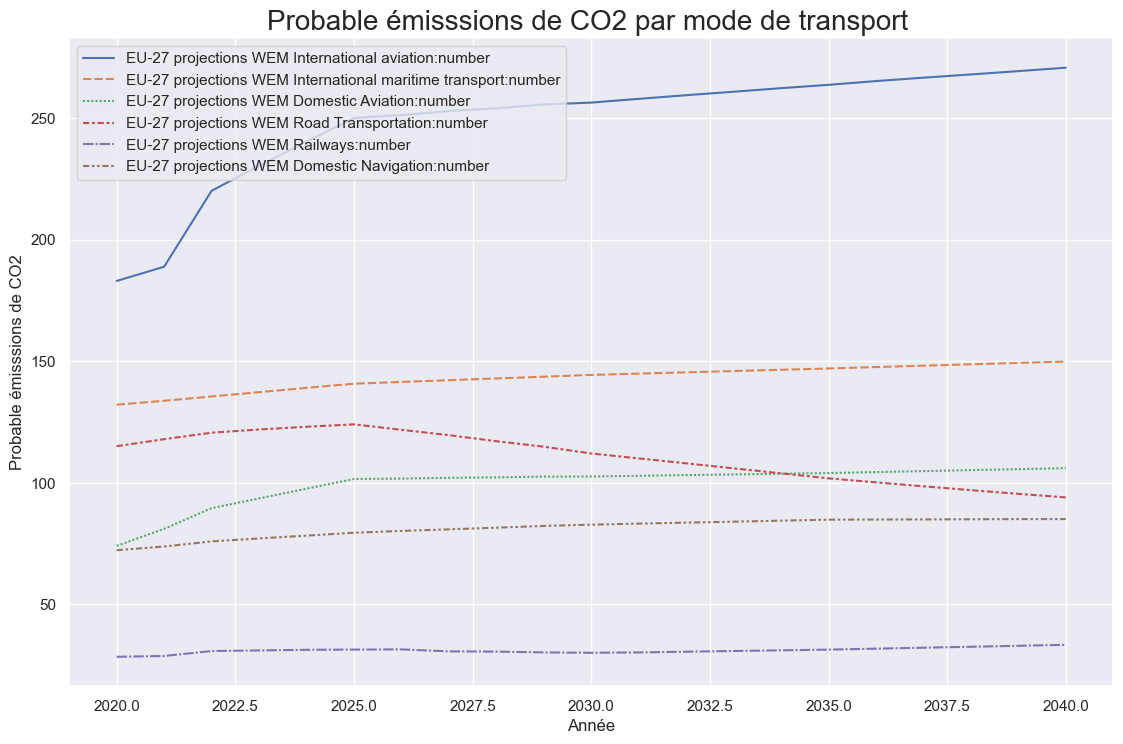

In [144]:
plt.figure(figsize =(12,8))
ax = plt.axes()

sns.lineplot(data = future,ax = ax)
ax.set(xlabel = "Année",ylabel = "Probable émisssions de CO2")

plt.title("Probable émisssions de CO2 par mode de transport ",fontsize = 20)
plt.savefig("projections.jpeg")

## 3 - La déforestation
Dans cette sous-partie nous allons étudier la déforestation, un phénomène bousculant l'équilibre de la planete. Par le biais de l'évolution des superficies de deux grandes forêts du monde soit celle du Brésil et de l'Indonésie.

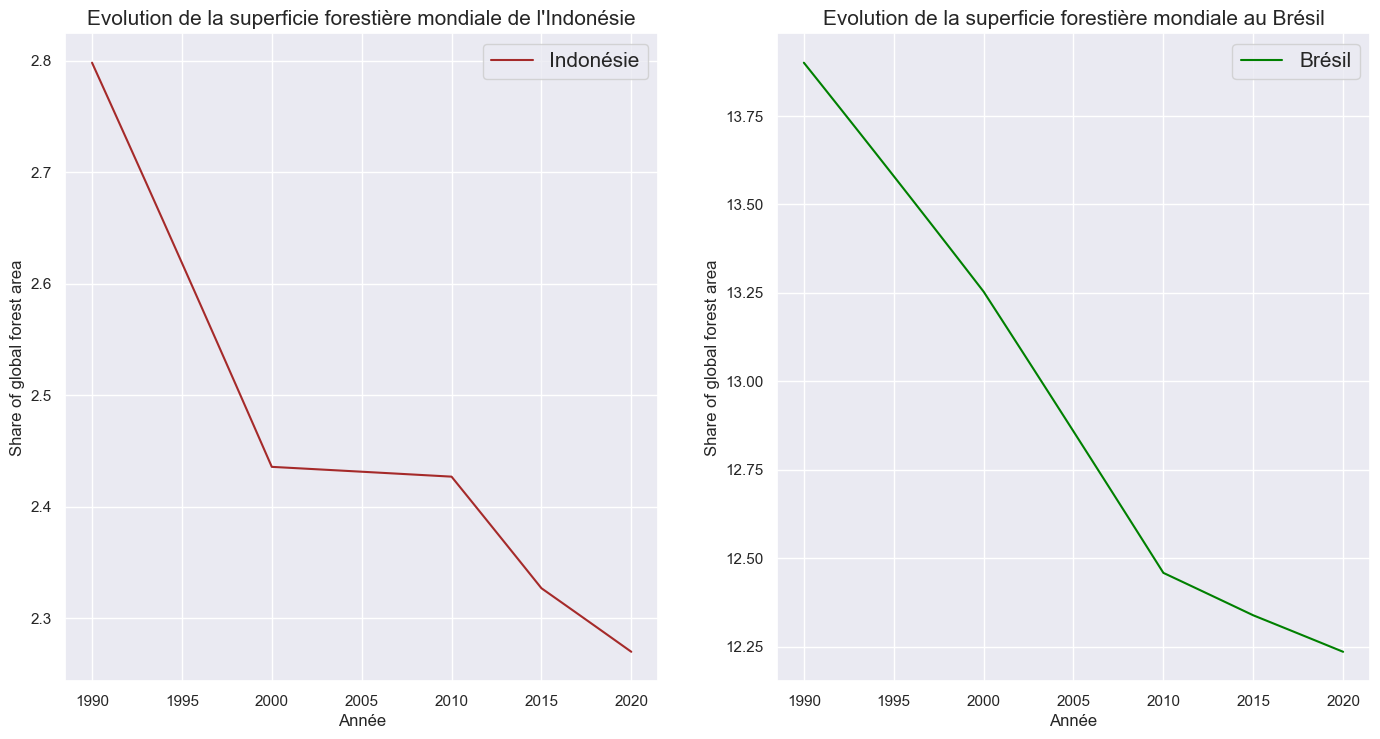

In [15]:
#Lecture et affichage d'une jeu de données contenant le partage de la supreficie forestière mondiale de 1990 a 2020
foret = pd.read_csv("share-global-forest.csv")
foret 

#dataframe se basant uniquement sur le Brésil
Bforet = foret[foret["Entity"]=="Brazil"]
Bforet

#dataframe se basant uniquement sur l'Indonésie
Iforet = foret[foret["Entity"]=="Indonesia"]
Iforet

#Création d'un graphique représentant l'évolution de la part de la superficie forestière mondiale du brésil et de l'indonésie
plt.figure(figsize = (15,8))

#utilisation de subplot pour avoir 2 graphique en 1 figure
#Indonésie 
ax1 = plt.subplot(1,2,1)

Iforet.plot(ax = ax1, x ='Year',y = "Share of global forest area", c = "brown", label = "Indonésie")
ax1 = ax1.set(xlabel = "Année",ylabel = "Share of global forest area" )

plt.legend(fontsize = 15)
plt.title("Evolution de la superficie forestière mondiale de l'Indonésie", fontsize = 15)

#Brésil
ax2 = plt.subplot(1,2,2)

Bforet.plot(ax = ax2, x = 'Year', y = "Share of global forest area", c = "green", label = "Brésil")
ax2 = ax2.set(xlabel = "Année",ylabel = "Share of global forest area" )

plt.legend(fontsize = 15)
plt.title("Evolution de la superficie forestière mondiale au Brésil", fontsize = 15)

plt.savefig("ShareforestB&I.png")

Ce diagramme en barre permet de constater que depuis 2001 les principales causes de déforestation en Indonsie sont la plantation d'huile de palme et la dérgradation des prairies.

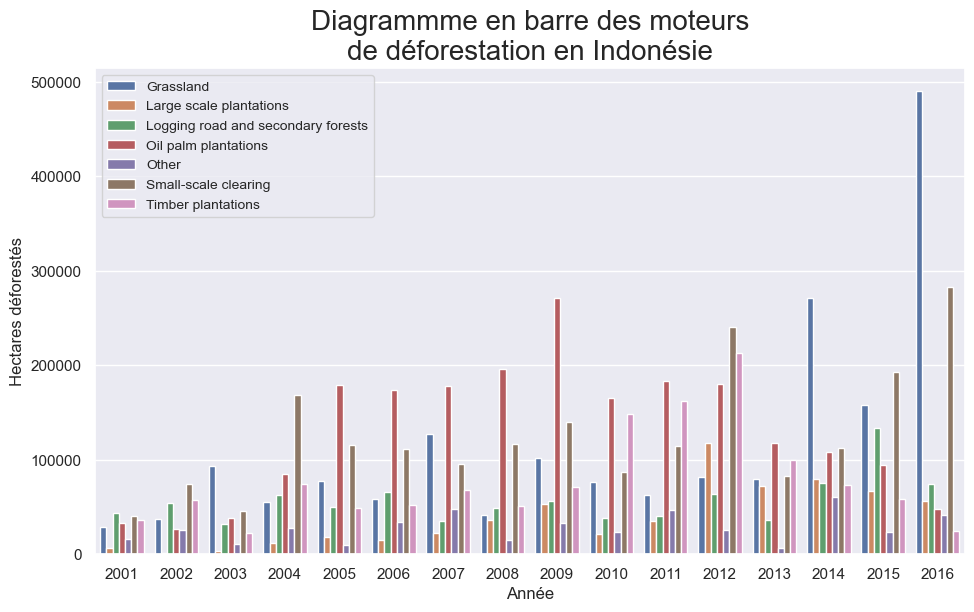

In [16]:
#Lecture et affichage d'un jeu de données contenant la déforestion en Indonésie par facteurs en hectares
defo = pd.read_csv("deforestation-drivers-indonesia.csv")
defo

#création d'un diagramme en barre et sauvegarde 
plt.figure(figsize = (10,6))
ax = plt.axes()

sns.set_theme(style="darkgrid")

sns.barplot(data = defo, x = "Year",y = "deforestation_hectares", hue = 'Entity',ax = ax)
ax = ax.set(xlabel='Année', ylabel='Hectares déforestés')
plt.legend(fontsize = 10,loc = "upper left")

plt.title("Diagrammme en barre des moteurs"+  "\n" + "de déforestation en Indonésie",fontsize = 20)
plt.savefig("Defo.png")

Au Brésil en Amazonie notamment, la dégradation des praires est plus que présent parmi les causes de déforestation. 

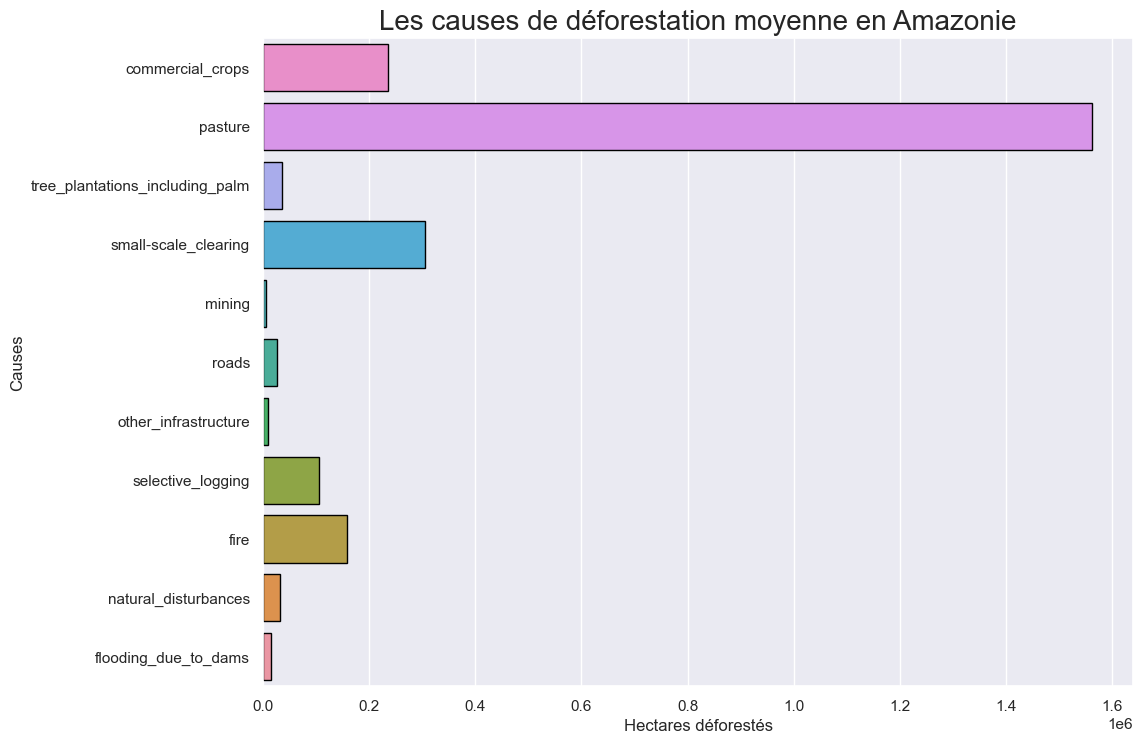

In [259]:
#lecture et affichage d'un jeu de donnée contenant les causes de déforestations dans la foret amazonienne du Brésil et les hectares déforestés par cause
brésil = pd.read_csv("drivers-forest-loss-brazil-amazon.csv")
brésil

#groupement par année et entité afin de pouvoir faire une moyenne sur les années pour chaque causes de déforestation
#affichage de bra par la suite
bra = brésil.groupby(["Entity","Year"]).sum()
bra = bra.mean(axis = 0)
bra

#créationnd'un dataframe pour une meillleure compréhension et réinitialisation des index
#affichage de bra
bra =pd.DataFrame(data = bra)
bra.reset_index(inplace = True)
bra

#On renomme les deux index afin qu'ils soient cohérents avec nos données
bra.rename(columns = {"index":"Causes"}, inplace = True)
bra.rename(columns = {0:"Hectares déforestés"}, inplace = True) 
bra 

#création d'un diagramme en barre sur la moyenne d'hectares déforestés de 2001 à 2013 par causes 
plt.figure(figsize =(10,8))
ax = plt.axes()

sns.barplot(ax = ax, data = bra, x ="Hectares déforestés" , y = "Causes",edgecolor = "black")
ax.invert_yaxis()

plt.title("Les causes de déforestation moyenne en Amazonie",fontsize = 20)
plt.savefig("BrazilAma.jpeg")

# III - Conclusion 

Afin de conclure, nous avons pu observer que durant ces dernières années l'émission de CO2 n'a fait qu'augmenter et cela est principalement du certains secteurs comme la production d'électricté,à travers le charbon mais aussi le transport car chaque jours le moindre déplacement effectué nous entraîne vers le réchauffement climatique. De plus la nature aidant à réguler le CO2, n'a plus autant d'impact à cause de la déforestaton.
Néanmoins nous remarquons des efforts et du changements dans les comportements avec l'arrivée des énergies renouvelables afin de diminuer l'empreinte carbone.

# Source

Les sources des différents jeux de données utilisées :

- CO2 kt : https://donnees.banquemondiale.org/indicator/EN.ATM.CO2E.KT?end=2015&name_desc=false&start=1960&type=shaded&view=map&year=2019

- co-emissions-by-sector : https://ourworldindata.org/grapher/co-emissions-by-sector

- energy : https://ourworldindata.org/energy

- Electricity_Production_By_Source :https://www.kaggle.com/datasets/prateekmaj21/electricity-production-by-source-world

- co2-emissions-transport : https://ourworldindata.org/transport#co2-emissions-from-transport ; via la seconde carte

- greenhouse-gas-emissions-from-transport-5 : https://www.eea.europa.eu/ims/greenhouse-gas-emissions-from-transport

- share-global-forest : https://ourworldindata.org/forest-area; dans la partie superficie forestiere totale

- deforestation-drivers-indonesia : https://ourworldindata.org/palm-oil  ; avant dernier graphique 

- drivers-forest-loss-brazil-amazon : https://ourworldindata.org/drivers-of-deforestation; vers la partie "La production de soja entraîne-t-elle la déforestation ?"